In [6]:
import pandas as pd 
import matplotlib.pyplot as plt

In [9]:
comments = pd.read_csv("data.csv")
#comments.to_csv('copy_of_' + 'data.csv')
#comments = pd.read_csv("copy_of_data.csv")
#comments = comments.drop('Unnamed: 0', 1)
#comments = comments.drop(['variant', 'images', 'verified', 'author', 'product', 'url'], axis = 1)
#comments.head()

In [10]:
print(len(comments))
#check for duplicates NaN values 
if any(comments.duplicated()):
    print("duplicates")
else: 
    print("no duplicates")

847
no duplicates


In [8]:
i = 0
for thing in comments["content"]:
    if "scoop" in thing or "spoon" in thing or "tsp" in thing or "tbsp" in thing or "oz" in thing:
        print(thing)
        print(str(i))
        i += 1
        print("\n")

The product works well for my needs.  The container's opening is a bit awkward to put my hand in to grab the small scoop.  I purchased a different container with a very wide opening, problem solved!
0


This product was given by my pharmacy in place of the thickening agent that was prescribed for my aspirating 5 month old daughter.  She immediately started having severely runny BMs after being a regular clay-once-a-dayer.  Turns out this is made of modified food starch and maltodextrin.  It even notes on the container that 1 serving of 2 Tablespoons = 1/2 fruit serving.  As a thickener for an infant, it's 2Tbsp per 4-5oz bottle - 6 times a day - or 3 fruit servings....!  No wonder she had watery poos - the kind where we change her a minimum of 3x day.  It was ridiculous and completely unsuitable for an infant. Like giving way too much apple juice for constipation.  WAY too much. Also, when used for aspirating, it doesn't thicken evenly, so it really didn't do the job for aspirating as 

In [9]:
import re
def has_numbers(inputString):
    return bool(re.search(r'\d', inputString))

In [21]:
i = 0
for thing in comments["content"]:
    if "pudding" in thing or "nectar" in thing or "honey" in thing:
        print(thing)
        print(str(i))
        print("\n")
        i = i+1
  

Mixes well with liquids when you make this it should be like a nectar consistency, use it for my 90 year old dad with swallowing problems, works great.
0


this stuff is great. I have a kitty I rescued that has no tongue, so he can't drink water. I get his water pudding consistency and mix it in with his food. He is probably the most hydrated cat around.  Will keep buying this as long as he is with us...thanks.
1


The doctor recommended my Mom switch to "nectar" thick beverages. This mixes up fairly well, especially when I use the stick immersion blender.  I let it sit in for a few minutes after mixing and it's perfect.
2


Super easy to use, has a TON of ways you can use this in everything, including going so far as to make a vegan pudding by replacing egg with this mixture and almond milk instead of regular milk. Works great, very tasteless!
3


It has directions on the back to instruct how to do pudding thickness and the like. We use this for a client, and it works wonders.
4


My 

Text(0, 0.5, 'count ')

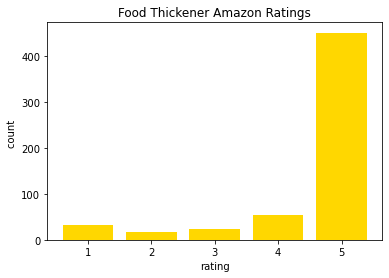

In [34]:
counts = [0,0,0,0,0]
for i in range(0, len(comments)):
    counts[int(comments['rating'][i]) -1] += 1
labels = ['1', '2', '3', '4', '5']
plt.bar(labels, counts, color = 'gold')
plt.title("Food Thickener Amazon Ratings")
plt.xlabel("rating")
plt.ylabel("count ")

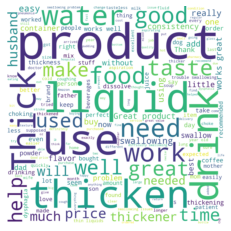

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [35]:
from wordcloud import WordCloud
text = ""
comments
for comment in comments["content"]:
    text += (" " + comment)
wordcloud = WordCloud(width=2000, height=2000, margin=0, background_color = "white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
wordgraphx = plt.figure()
plt.show()
plt.savefig('wordcloud.png')

This one is done without any text cleaning. See below for one done with cleaninging 
text cleaning: 
take out words that don't have meaning, want nouns and adjectives, remove verbs, further restrict

interpolation "bilinear" what are the other options 

In [36]:
#Import packages
import pandas as pd
import re, string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from textblob import TextBlob
sw = stopwords.words('english')

In [37]:
#add an additonal column, copying values of content, so that when content column gets modfified, 
#we still have the original comments 
original = []
for i in range(0, len(comments)):
    original.append(comments['content'][i])
comments.insert(4, "original text", original, True)
comments.head()

,title,content,date,rating,original text
0,Five Stars,Great Product.,16 Jun 2016,5.0,Great Product.
1,Five Stars,As good as it gets !!!!,22 Aug 2016,5.0,As good as it gets !!!!
2,Five Stars,Order always arrives promptly. I order from Pr...,06 Jul 2016,5.0,Order always arrives promptly. I order from Pr...
3,Three Stars,Good product and good value.,08 Aug 2014,3.0,Good product and good value.
4,Great value,Bought to try for daughter that has trouble sw...,20 Apr 2021,5.0,Bought to try for daughter that has trouble sw...


In [38]:
#The function
def clean_text(text):
    text = text.lower()
    text = re.sub('@', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r"[^a-zA-Z ]+", "", text)
    
    #Tokenize the data
    text = nltk.word_tokenize(text)
    #Remove stopwords
    text = [w for w in text if w not in sw]
    return text

In [39]:
comments['content'] = comments['content'].apply(lambda x: clean_text(x))    

In [40]:
#Lemmatizer
lemmatizer = WordNetLemmatizer()
def lem(text):
    text = [lemmatizer.lemmatize(t) for t in text]
    text = [lemmatizer.lemmatize(t, 'v') for t in text]
    return text

In [41]:
comments['content'] = comments['content'].apply(lambda x: lem(x))

Ratings plot 

look into packages further, how they decide sentiment 


In [42]:
#Get sentiment from comments
comments['content'] = [str(thing) for thing in comments['content']]
polarity = []
subjectivity = []
for i in range(len(comments)):
    blob = TextBlob(comments['content'][i])
    for sentence in blob.sentences:
        polarity.append(sentence.sentiment.polarity)
        subjectivity.append(sentence.sentiment.subjectivity)
comments.insert(4, "polarity", polarity, True)
comments.insert(5, "subjectivity", subjectivity, True)
comments.head()
##comments['analysis']=sentiment
#Plot
#comments['analysis'].plot.hist(color='salmon', title='Comments Polarity')

,title,content,date,rating,polarity,subjectivity,original text
0,Five Stars,"['great', 'product']",16 Jun 2016,5.0,0.800,0.75,Great Product.
1,Five Stars,"['good', 'get']",22 Aug 2016,5.0,0.700,0.60,As good as it gets !!!!
2,Five Stars,"['order', 'always', 'arrive', 'promptly', 'ord...",06 Jul 2016,5.0,-0.125,1.00,Order always arrives promptly. I order from Pr...
3,Three Stars,"['good', 'product', 'good', 'value']",08 Aug 2014,3.0,0.700,0.60,Good product and good value.
4,Great value,"['buy', 'try', 'daughter', 'trouble', 'swallow...",20 Apr 2021,5.0,0.040,0.58,Bought to try for daughter that has trouble sw...


0.0
0.2
0.5
Freedman–Diaconis number of bins: 17


Text(0.5, 0, 'Polarity')

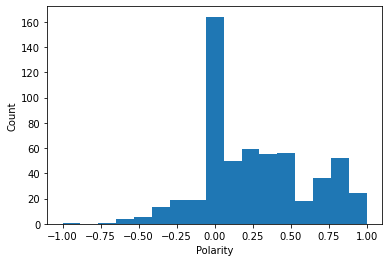

In [43]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

q25, q50, q75 = np.percentile(comments['polarity'], [25, 50, 75])
print(q25)
print(q50)
print(q75)
bin_width = 2 * (q75 - q25) * len(comments['polarity']) ** (-1/3)
bins = round((comments['polarity'].max() - comments['polarity'].min()) / bin_width)
print("Freedman–Diaconis number of bins:", bins)
plt.hist(comments['polarity'], bins=bins);

#plt.hist(comments['sentiment'], density=True, bins=30)  # density=False would make counts
plt.ylabel('Count')
plt.xlabel('Polarity')

0.2
0.5156696428571428
0.7
Freedman–Diaconis number of bins: 8


Text(0.5, 0, 'Subjectivity')

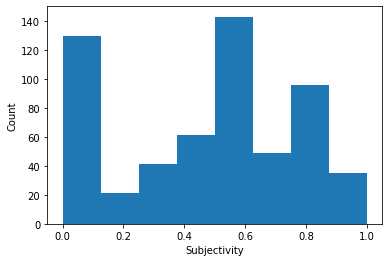

In [44]:
q25, q50, q75 = np.percentile(comments['subjectivity'], [25, 50, 75])
print(q25)
print(q50)
print(q75)
bin_width = 2 * (q75 - q25) * len(comments['subjectivity']) ** (-1/3)
bins = round((comments['subjectivity'].max() - comments['subjectivity'].min()) / bin_width)
print("Freedman–Diaconis number of bins:", bins)
plt.hist(comments['subjectivity'], bins=bins);

#plt.hist(comments['sentiment'], density=True, bins=30)  # density=False would make counts
plt.ylabel('Count')
plt.xlabel('Subjectivity')

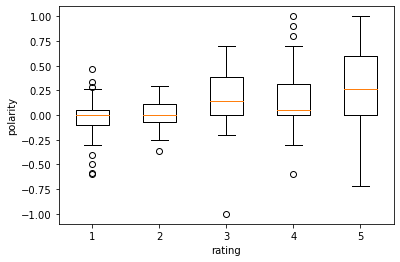

In [45]:
#plt.scatter(comments['sentiment'], comments['rating'], color = "green")
#plt.xlabel("sentiment")
#plt.ylabel("rating")

polaritySorted = [[], [], [], [],[]]
for i in range(0, len(comments)):
    polaritySorted[int(comments['rating'][i])-1].append(comments['polarity'][i])
#print(sentimentsSorted)
plt.boxplot((polaritySorted[0], polaritySorted[1], polaritySorted[2], polaritySorted[3], polaritySorted[4]))
plt.xlabel("rating")
plt.ylabel("polarity")
plt.show()

add box and whisker plots for each rating 
calculate outliers 

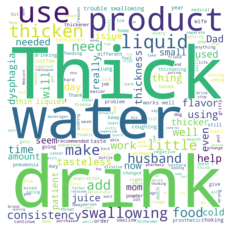

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [46]:
text = ""
for i in range(0,len(comments)):
    if comments["polarity"][i] < 0:
        text += comments['original text'][i] + " "
        #print(type(comments['content'][i]))
        #for word in (comments['content'][i]):
        #    text += (" " + word)
         #   print(word)
wordcloud = WordCloud(width=2000, height=2000, margin=0, background_color = "white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
wordgraphx = plt.figure()
plt.show()
plt.savefig('wordcloud.png')

can't tell if too thick or not thick enough 
want to look into grabbing features 
text analysis thickness keyword, 2-3 words behind and before it, analyze that, thick, consistency, viscosity, etc keywords to look into, what kind of combinatiosn around these words, 

swallowing, what issues appear with it, flavor/taste/smell perception, use appears a lot, how is it being used 

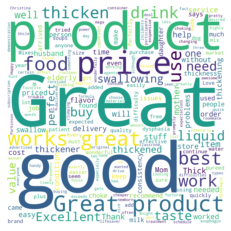

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [47]:
text = ""
for i in range(0,len(comments)):
    if comments["polarity"][i] > 0.50:
        text += comments['original text'][i] + " "
wordcloud = WordCloud(width=2000, height=2000, margin=0, background_color = "white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
wordgraphx = plt.figure()
plt.show()
plt.savefig('wordcloud.png')

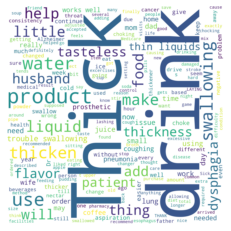

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [48]:
text = ""
datapoints = 0
for i in range(0,len(comments)):
    if comments["polarity"][i] < 0 and comments['rating'][i] == 5:
        text += comments['original text'][i] + " "
        datapoints += 1
wordcloud = WordCloud(width=2000, height=2000, margin=0, background_color = "white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
wordgraphx = plt.figure()
plt.show()
plt.savefig('wordcloud.png')

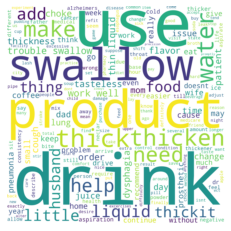

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [49]:
text = ""
datapoints = 0
for i in range(0,len(comments)):
    if comments["polarity"][i] < 0 and comments['rating'][i] == 5:
        for words in comments['content'][i][2:-2].split("', '"):
            text += words + " "
        datapoints += 1
wordcloud = WordCloud(width=2000, height=2000, margin=0, background_color = "white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
wordgraphx = plt.figure()
plt.show()
plt.savefig('wordcloud.png')

The wordcloud above this one and one above show the same comments. However, the first text had no processing while the second one is lematized to group together similar words. 

In [50]:
print(datapoints)
#number of comments 

43


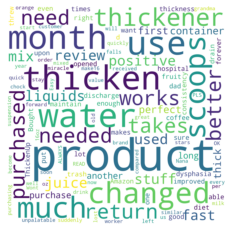

<Figure size 432x288 with 0 Axes>

7


<Figure size 432x288 with 0 Axes>

In [51]:
text = ""
datapoints = 0
for i in range(0,len(comments)):
    if comments["polarity"][i] > 0.2 and (comments['rating'][i] == 1 or comments['rating'][i] == 2):
        text += comments['original text'][i] + " "
        datapoints += 1
wordcloud = WordCloud(width=2000, height=2000, margin=0, background_color = "white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
wordgraphx = plt.figure()
plt.show()
plt.savefig('wordcloud.png')
print(datapoints)

In [52]:
#From lists of comments to a single list containing all words      
all_words=[]   
text = ""
for i in range(len(comments)):
    for words in comments['content'][i][2:-2].split("', '"):
        text += words + " "

        
#Bigrams
#bigrm = list(nltk.bigrams(text))
#words_2 = nltk.FreqDist(bigrm)
#words_2.plot(20, color='salmon', title='Bigram Frequeancy')

In [53]:
comment_length = []
for i in range(len(comments)):
    comment_length.append(len(comments['content'][i][2:-2].split("', '")))
comments.insert(4, "length", comment_length, True)
comments.head()

,title,content,date,rating,length,polarity,subjectivity,original text
0,Five Stars,"['great', 'product']",16 Jun 2016,5.0,2,0.800,0.75,Great Product.
1,Five Stars,"['good', 'get']",22 Aug 2016,5.0,2,0.700,0.60,As good as it gets !!!!
2,Five Stars,"['order', 'always', 'arrive', 'promptly', 'ord...",06 Jul 2016,5.0,11,-0.125,1.00,Order always arrives promptly. I order from Pr...
3,Three Stars,"['good', 'product', 'good', 'value']",08 Aug 2014,3.0,4,0.700,0.60,Good product and good value.
4,Great value,"['buy', 'try', 'daughter', 'trouble', 'swallow...",20 Apr 2021,5.0,15,0.040,0.58,Bought to try for daughter that has trouble sw...


4.0
8.0
15.0
Freedman–Diaconis number of bins: 98


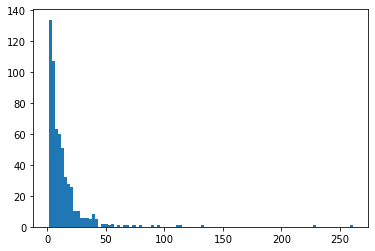

In [54]:
q25, q50, q75 = np.percentile(comments['length'], [25, 50, 75])
print(q25)
print(q50)
print(q75)
bin_width = 2 * (q75 - q25) * len(comments['length']) ** (-1/3)
bins = round((comments['length'].max() - comments['length'].min()) / bin_width)
print("Freedman–Diaconis number of bins:", bins)
plt.hist(comments['length'], bins=bins);

Text(0.5, 0, 'polarity')

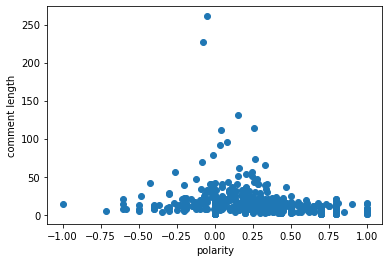

In [55]:
plt.scatter(comments['polarity'],comments['length'])
plt.ylabel("comment length")
plt.xlabel("polarity")

The longer the comment, the more difficult it seems to extract a sentiment 

In [56]:
def contains(keywords, search): 
    for key in keywords: 
        if key in search:
            return search.index(key)
    return -1

In [57]:
#search and extract 3 words before and after vicosity keyword 
#https://stackoverflow.com/questions/17645701/extract-words-surrounding-a-search-word
import re
keywords = ["thicken", "thick", "visosity", "consistency", "nectar", "syrup"]
viscosity_words = []
datapoints = 0
total_text = ""
for i in range(0, len(comments)):
    comment = comments['content'][i][2:-2].split("', '")
    index = contains(keywords, comment)
    if index == -1:
        continue
    words= "['"
    for x in range(-3, 3):
        if ((index + x) < 0) or ((index + x) >= len(comment)): 
            continue
        words += comment[x + index] + "', '"
        total_text += comment[x + index] + ' '
    words = words[0: -3] + "]"
    viscosity_words.append(words)
    datapoints += 1

In [58]:
#comments['content'] = [str(thing) for thing in comments['content']]
viscosity_polarity = []
for i in range(len(viscosity_words)):
    blob = TextBlob(viscosity_words[i])
    for sentence in blob.sentences:
        viscosity_polarity.append(sentence.sentiment.polarity)
#print(viscosity_polarity)

0.0
0.2
0.5
Freedman–Diaconis number of bins: 8


Text(0.5, 0, 'polarity')

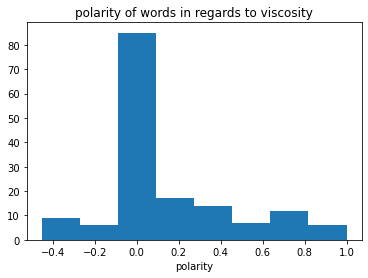

In [60]:
q25, q50, q75 = np.percentile(polarity, [25, 50, 75])
print(q25)
print(q50)
print(q75)
bin_width = 2 * (q75 - q25) * len(viscosity_polarity) ** (-1/3)
bins = round((max(viscosity_polarity) - min(viscosity_polarity)) / bin_width)
print("Freedman–Diaconis number of bins:", bins)
plt.hist(viscosity_polarity, bins=bins)
plt.title("polarity of words in regards to viscosity")
plt.xlabel("polarity")

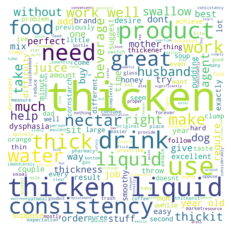

<Figure size 432x288 with 0 Axes>

156


<Figure size 432x288 with 0 Axes>

In [61]:
wordcloud = WordCloud(width=2000, height=2000, margin=0, background_color = "white").generate(total_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
wordgraphx = plt.figure()
plt.show()
plt.savefig('wordcloud.png')
print(datapoints)

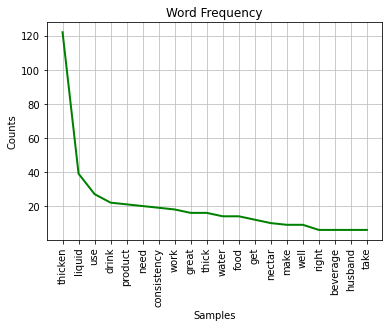

In [73]:
#From lists of comments to a single list containing all words      
all_words= total_text.split(" ")     
#print(all_words)

#Get word frequency        
nlp_words = nltk.FreqDist(all_words)
plot1 = nlp_words.plot(20, color='green', title='Word Frequency for Viscosity Keywords')
#print(all_words)


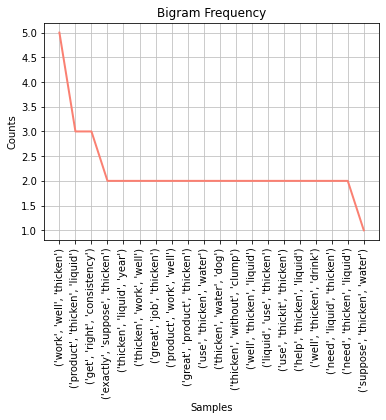

<AxesSubplot:title={'center':'Bigram Frequency'}, xlabel='Samples', ylabel='Counts'>

In [77]:
#Bigrams
bigrm = list(nltk.trigrams(all_words))
words_2 = nltk.FreqDist(bigrm)
words_2.plot(20, color='salmon', title='Bigram Frequency')

In [67]:
print(total_text[0:5])

exact


**word linkage, how different words relate to viscosity and consistency**, mining for reuglar statistics, count the frequency of the words less than word cloud 

try out with tensorflow, focus on tensorflow NLP, don't have to use data, can use other data, get famliar with the package 

in a sentence, partition sentence, eahc worked can be labled, depending on location of words, are subcategories, subject of sentence, and other nouns, starting with sentence, add column of data, detect center of comment, do analysis with that, what are most talked about topics, much newer, **labeling** stuff 

mining word linkage from center of sentence, focsu on adjectives relating to the center, visocisty correlated with different adjectives, 

have algoirhtm detect center, do sentiment analysis from there as well 

want to extract product features from comments 

is there one type of viscosity, or multiple, are there a series of products that given different viscosities? 
    break down comments futher, do they disclose which kind of visocsoity is needed 
    
how can you shirnk the sentences to analyze 